In [57]:
import numpy as np
import pandas as pd
df=pd.read_csv("DATA-FINAL.csv")


In [58]:
data=df[df['MHRDName']=="Bachelor of Technology (Electrical and Electronics Engineering)"]


In [59]:
#print(data['MHRDName'])


In [60]:
print(data.shape)

(981, 22)


In [61]:
data=pd.DataFrame(data)
#data

In [62]:
print(data.isnull().sum())

Termid           0
Regd No          0
Course           0
Grade            0
CA_100          30
MTT_50         362
ETT_100        312
ETP_100        669
Course_Att      81
MHRDName         0
CA_1            30
CA_2            30
CA_3            30
CA_4            30
Height           0
Weight           0
ScholarType      0
Direction        0
Gender           0
Medium           0
CourseType       0
ProgramType      0
dtype: int64


In [63]:
print(data.describe())

              Termid       Regd No      CA_100      MTT_50     ETT_100  \
count     981.000000  9.810000e+02  951.000000  619.000000  669.000000   
mean   266510.042813  8.211999e+06   61.891693   24.352181   49.994021   
std     86718.667638  4.289843e+06   20.324210   11.195326   22.645669   
min    118192.000000  1.107776e+06    0.000000    0.000000    0.000000   
25%    218192.000000  4.865776e+06   52.000000   18.000000   38.000000   
50%    218192.000000  8.512776e+06   65.000000   25.000000   53.000000   
75%    318192.000000  1.199078e+07   76.000000   32.000000   67.000000   
max    418192.000000  1.524578e+07  100.000000   49.000000   93.000000   

          ETP_100  Course_Att        CA_1        CA_2        CA_3        CA_4  \
count  312.000000  900.000000  951.000000  951.000000  951.000000  951.000000   
mean    67.544872   83.326667   30.533123   15.524711    7.878023    7.955836   
std     19.402769   14.459947   21.817104   15.819214   10.426780   10.358223   
min      

In [64]:
cols1=data._get_numeric_data().columns
cols2=df.columns

c1=['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100',
       'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight']
c2=['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType']
      
    

In [65]:
print(c1,cols2)

['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight'] Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')


In [66]:
category_clos1=['']
c3=list(set(c2)-set(c1))
print(data[c3].isnull().sum())

MHRDName       0
Grade          0
Medium         0
Gender         0
ScholarType    0
Course         0
ProgramType    0
CourseType     0
Direction      0
dtype: int64


# removing null values

In [67]:
from sklearn.preprocessing import Imputer
im=Imputer(strategy='mean',missing_values=np.nan)
data['CA_100']=im.fit_transform(data[['CA_100']].values)
data['MTT_50']=im.fit_transform(data[['MTT_50']].values)
data['ETT_100']=im.fit_transform(data[['ETT_100']].values)
data['ETP_100']=im.fit_transform(data[['ETP_100']].values)
data['Course_Att']=im.fit_transform(data[['Course_Att']].values)
data['CA_1']=im.fit_transform(data[['CA_1']].values)
data['CA_2']=im.fit_transform(data[['CA_2']].values)
data['CA_3']=im.fit_transform(data[['CA_3']].values)
data['CA_4']=im.fit_transform(data[['CA_4']].values)
print(data.isnull().sum())



Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
MHRDName       0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


##

In [68]:
data['Grade'].unique()

array(['C', 'D', 'E', 'A', 'B', 'A+', 'B+', 'O', 'F', 'R', 'I'],
      dtype=object)

In [69]:
grade_map={'O':100,'A+':90,'A':80,'B+':70,'B':60,'C':50,'D':40,'E':30,'F':20,'I':10,'M':0,'R':0}

In [70]:
data['Grade']=data['Grade'].map(grade_map)

In [71]:
#data['Grade']

In [72]:
dd=np.array(pd.DataFrame(data.groupby("Course",as_index=False)['Grade'].mean()))

In [73]:
data1=data

In [74]:
dd

array([['KNF1007', 60.0],
       ['KNF1022', 76.66666666666667],
       ['KNF1081', 100.0],
       ['KNF1082', 78.0],
       ['KNF1083', 76.0],
       ['KNF1093', 52.5],
       ['KNF1094', 76.0],
       ['KNF1131', 70.0],
       ['KNF1148', 80.0],
       ['KNF118', 90.0],
       ['KNF1247', 90.0],
       ['KNF1288', 81.66666666666667],
       ['KNF1289', 87.5],
       ['KNF145', 65.0],
       ['KNF150', 82.5],
       ['KNF153', 72.0],
       ['KNF155', 62.5],
       ['KNF158', 61.36363636363637],
       ['KNF159', 57.5],
       ['KNF1668', 90.0],
       ['KNF1669', 90.0],
       ['KNF1692', 75.0],
       ['KNF1819', 50.0],
       ['KNF1820', 60.0],
       ['KNF1847', 38.333333333333336],
       ['KNF20', 59.26829268292683],
       ['KNF202', 71.25],
       ['KNF21', 50.48780487804878],
       ['KNF22', 53.41463414634146],
       ['KNF23', 57.80487804878049],
       ['KNF238', 92.5],
       ['KNF24', 63.90243902439025],
       ['KNF241', 77.14285714285714],
       ['KNF25', 72.926829268

In [75]:
di={}
for p in dd:
    di[p[0]]=p[1]
di

{'KNF1007': 60.0,
 'KNF1022': 76.66666666666667,
 'KNF1081': 100.0,
 'KNF1082': 78.0,
 'KNF1083': 76.0,
 'KNF1093': 52.5,
 'KNF1094': 76.0,
 'KNF1131': 70.0,
 'KNF1148': 80.0,
 'KNF118': 90.0,
 'KNF1247': 90.0,
 'KNF1288': 81.66666666666667,
 'KNF1289': 87.5,
 'KNF145': 65.0,
 'KNF150': 82.5,
 'KNF153': 72.0,
 'KNF155': 62.5,
 'KNF158': 61.36363636363637,
 'KNF159': 57.5,
 'KNF1668': 90.0,
 'KNF1669': 90.0,
 'KNF1692': 75.0,
 'KNF1819': 50.0,
 'KNF1820': 60.0,
 'KNF1847': 38.333333333333336,
 'KNF20': 59.26829268292683,
 'KNF202': 71.25,
 'KNF21': 50.48780487804878,
 'KNF22': 53.41463414634146,
 'KNF23': 57.80487804878049,
 'KNF238': 92.5,
 'KNF24': 63.90243902439025,
 'KNF241': 77.14285714285714,
 'KNF25': 72.92682926829268,
 'KNF252': 61.42857142857143,
 'KNF253': 75.0,
 'KNF26': 74.63414634146342,
 'KNF267': 86.2,
 'KNF27': 63.90243902439025,
 'KNF28': 66.58536585365853,
 'KNF310': 87.5,
 'KNF311': 95.0,
 'KNF312': 80.0,
 'KNF333': 76.0,
 'KNF334': 76.0,
 'KNF336': 69.0,
 'KNF37': 7

In [76]:
data['Strength']=data['Course'].map(di)

In [123]:
target=[]
for st in data['Strength']:
    if st>=80:
        target.append(0)
    elif st>=65:
        target.append(1)
    else:
        target.append(2)
#target

In [87]:
#data['Strength']

In [109]:
li=['MTT_50','ETT_100','CA_100','Strength']
X=data[li]

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,target,test_size=0.25)


In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8861788617886179

In [116]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train,y_train)
y1_pred=svm.predict(x_test)

In [117]:
accuracy_score(y1_pred,y_test)

1.0

In [118]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
GaussianNB(priors=None)
clf.fit(x_train,y_train)
y2_pred=clf.predict(x_test)

In [119]:
accuracy_score(y2_pred,y_test)

0.9390243902439024

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y3_pred=dt.predict(x_test)

In [122]:
accuracy_score(y3_pred,y_test)

1.0

In [92]:
data.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType,Strength
18,218192,1107776,KNF20,50,57.0,15.000000,36.000000,67.544872,85.0,Bachelor of Technology (Electrical and Electro...,...,8.0,158,70,Hostler,East,Male,Regional,Theory,UG,59.268293
19,218192,1107776,KNF21,40,40.0,32.000000,30.000000,67.544872,66.0,Bachelor of Technology (Electrical and Electro...,...,0.0,158,70,Hostler,East,Male,Regional,Theory,UG,50.487805
20,218192,1107776,KNF22,30,72.0,14.000000,6.000000,67.544872,77.0,Bachelor of Technology (Electrical and Electro...,...,9.0,158,70,Hostler,East,Male,Regional,Theory,UG,53.414634
21,218192,1107776,KNF23,50,60.0,30.000000,36.000000,67.544872,70.0,Bachelor of Technology (Electrical and Electro...,...,3.0,158,70,Hostler,East,Male,Regional,Theory,UG,57.804878
22,218192,1107776,KNF24,30,55.0,24.352181,49.994021,15.000000,98.0,Bachelor of Technology (Electrical and Electro...,...,1.0,158,70,Hostler,East,Male,Regional,Theory,UG,63.902439


In [79]:
data.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType', 'Strength'],
      dtype='object')

In [80]:
cols1=data._get_numeric_data().columns
cols2=df.columns
c1=['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100',
       'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight']
c2=['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType']

In [81]:
X=data[['Course','Strength']]

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Course']=le.fit_transform(X['Course'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
print(np.array(X)[:,1],np.array(X)[:,0])

[ 59.26829268  50.48780488  53.41463415  57.80487805  63.90243902
  72.92682927  74.63414634  63.90243902  66.58536585  59.26829268
  50.48780488  53.41463415  57.80487805  63.90243902  72.92682927
  74.63414634  63.90243902  66.58536585  76.          76.
  72.          62.5         61.36363636  54.04761905  67.5
  56.13636364  66.13636364  71.25        54.77272727  59.26829268
  50.48780488  53.41463415  57.80487805  63.90243902  72.92682927
  74.63414634  63.90243902  66.58536585  76.          76.
  59.26829268  50.48780488  53.41463415  57.80487805  63.90243902
  72.92682927  74.63414634  63.90243902  66.58536585  59.26829268
  50.48780488  53.41463415  57.80487805  63.90243902  72.92682927
  74.63414634  63.90243902  66.58536585  86.2         75.71428571
  81.9047619   59.26829268  50.48780488  53.41463415  57.80487805
  63.90243902  72.92682927  74.63414634  63.90243902  66.58536585
  72.          61.36363636  71.25        54.04761905  67.5
  56.13636364  66.13636364  54.77272727 

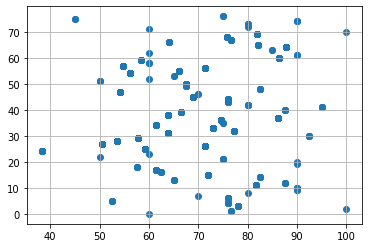

In [84]:
import matplotlib.pyplot as plt
plt.scatter(np.array(X)[:,1],np.array(X)[:,0],marker='o')
plt.grid()
plt.show()

In [85]:
target=['Course','Strength','CA_100', 'MTT_50', 'ETT_100', 'ETP_100']
X=data[target]
X
    

,Course,Strength,CA_100,MTT_50,ETT_100,ETP_100
18,KNF20,59.268293,57.000000,15.000000,36.000000,67.544872
19,KNF21,50.487805,40.000000,32.000000,30.000000,67.544872
20,KNF22,53.414634,72.000000,14.000000,6.000000,67.544872
21,KNF23,57.804878,60.000000,30.000000,36.000000,67.544872
22,KNF24,63.902439,55.000000,24.352181,49.994021,15.000000
23,KNF25,72.926829,82.000000,24.352181,49.994021,80.000000
24,KNF26,74.634146,50.000000,25.000000,19.000000,67.544872
25,KNF27,63.902439,52.000000,22.000000,43.000000,67.544872
26,KNF28,66.585366,47.000000,25.000000,63.000000,67.544872
539,KNF20,59.268293,90.000000,35.000000,80.000000,67.544872


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split()

ValueError: At least one array required as input

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
y_sv=svm.fit_predict(X)



In [ ]:
d=[]
d=pd.DataFrame(d)
d['Sample']=y_km

In [ ]:
d['Sample'].unique()

In [ ]:
X.head(10)

In [ ]:
for i in range(10):
    print(y_km[i])